Association rules are the result of market basket analysis that specify patterns found in the relationships among items.
$$\{peanut butter, jelly\} \rightarrow \{bread\}$$

If peanut putter and jelly are purchased together, then bread is also likely to be purchased. Peanut butter and jelly imply bread.

Association rules applications:
+ useful for searching interesting and frequently occuring patterns of DNA and protein sequences in cancer data
+ finding patterns of purchases or medical claims that occur in combination with fradulent credit card or insurance use
+ identifying combinations of behavior that precede customers dropping their cellular phone service or upgrading their cable TV package

A priori:
+ Is capable of working with large amounts of transactional data
+ Results in rules theat are easy to understand
+ Useful for "data mining" and discovering unexpected knowledge in DBs
- Not very helpful for small datasets
- Requires effort to separate the true insight from common sense
- Easy to draw spurious conclusions from random patterns

Apriori property: {motor oil, lipstic} can only be frequent when both {motor oil} and {lipstick} occur frequently as well.

If either motor oil or lipstick is infrequent, any set containing these items can be excluded from the search.

<b>Support</b> of an itemset or rule measures how frequently it occurs in the data. A function defining support for the itemset X can be defined as:

$$support(X) = \frac{count(X)}{N}$$

N - number of transations in the database

count(X) - the number of transactions containing itemset X.

if 2 transactions out of 5 contain a candy bar, then:

$$support(candy bar) = \frac{2}{5}=.4$$

<b>Confidence</b> is a measurement of its predictive power or accuracy.

It is defined as the support of the itemset containing both X and Y divided by the support of the itemset containing only X:

$$confidence(X\rightarrow Y)=\frac{support(X,Y)}{support(X)}$$

support(X, Y) are transactions where X and Y appear together divided by the total number of transactions

$$\{flowers\}\rightarrow \{get well card\}$$

is different from

$$\{get well card\} \rightarrow \{flowers\}$$

$$support(A, B) = P(A\cap B)$$

$$confidence(A \rightarrow B) = P(B|A)$$

# identifying frequently purchased groceries with association rules

In [1]:
library(arules)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [2]:
groceries = read.transactions('../../R_projects//MLwR/Machine Learning with R (2nd Ed.)//Chapter 08/groceries.csv',
                             sep=',')

In [3]:
summary(groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

During 30 days of operation, the average transaction contained 43,367 / 9,835 = 4.409 distinct grocery items.

2,513 / 9,835 = 0.2555, we can determine that the whole milk appeared in 25.6 percent of the transactions.

In [4]:
inspect(groceries[1:5])

    items                     
[1] {citrus fruit,            
     margarine,               
     ready soups,             
     semi-finished bread}     
[2] {coffee,                  
     tropical fruit,          
     yogurt}                  
[3] {whole milk}              
[4] {cream cheese,            
     meat spreads,            
     pip fruit,               
     yogurt}                  
[5] {condensed milk,          
     long life bakery product,
     other vegetables,        
     whole milk}              


In [5]:
itemFrequency(groceries[, 1:3])

abrasive cleaner artif. sweetener   baby cosmetics 
    0.0035587189     0.0032536858     0.0006100661

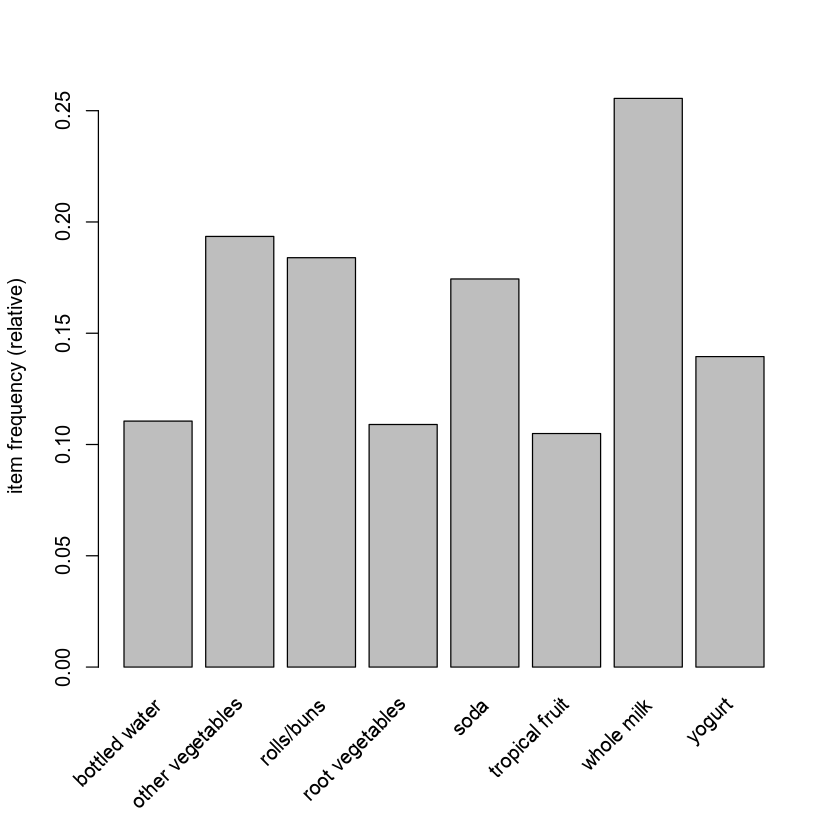

In [6]:
itemFrequencyPlot(groceries, support = .1)

Warning message in plot.window(xlim, ylim, log = log, ...):
“"labels" is not a graphical parameter”

ERROR: Error in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, : formal argument "labels" matched by multiple actual arguments


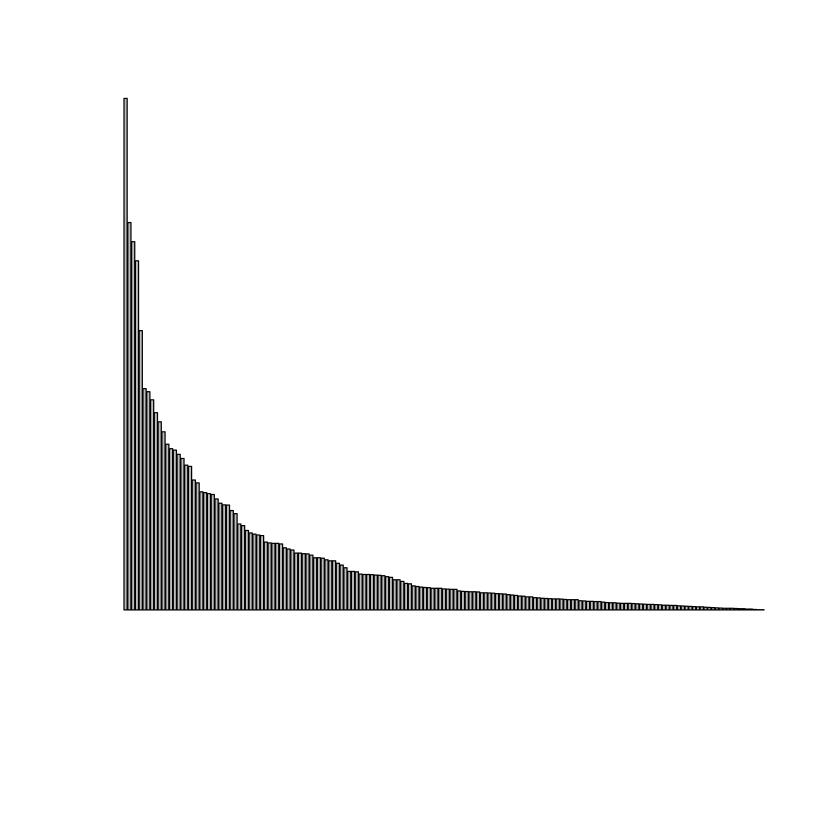

In [7]:
itemFrequencyPlot(groceries, topN = 169, labels=F)

Logarytmy są wszędzie!

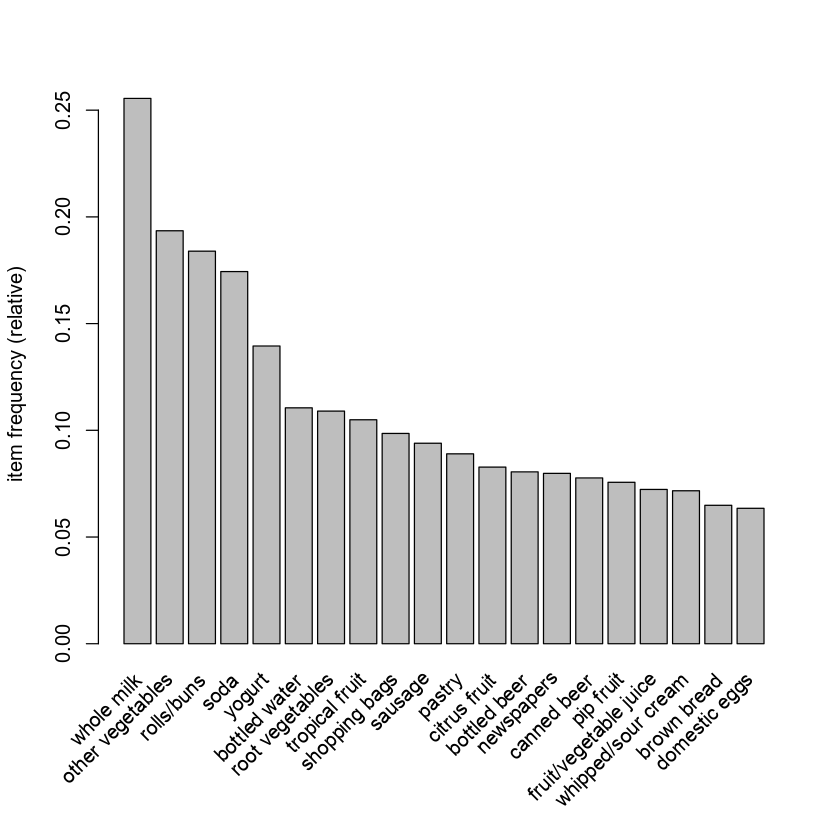

In [8]:
itemFrequencyPlot(groceries, topN = 20)

# Visualizing the transaction data

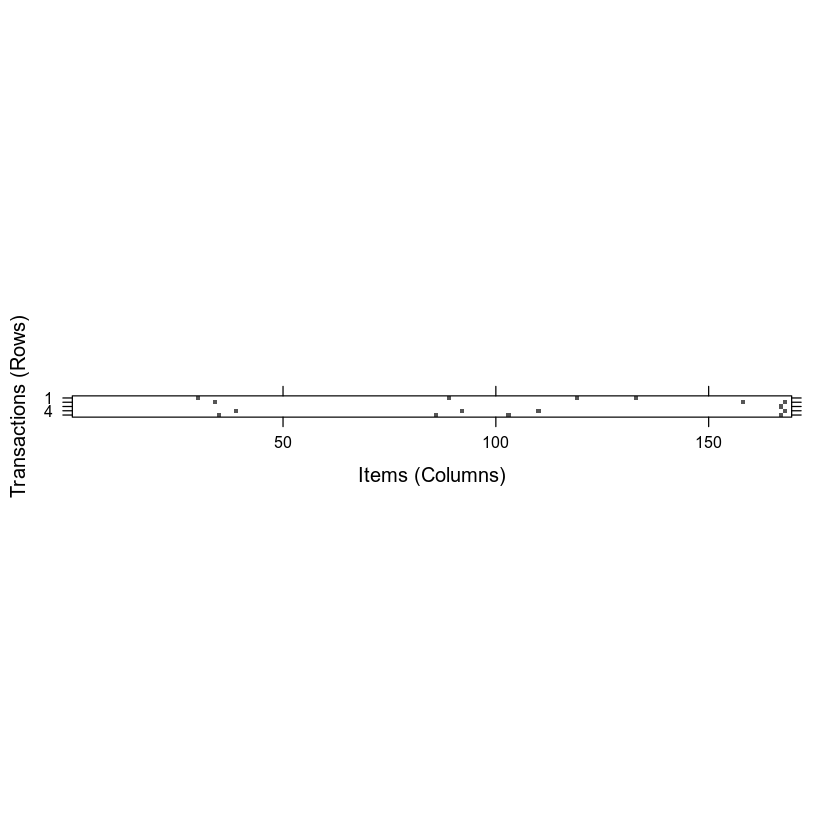

In [10]:
image(groceries[1:5])

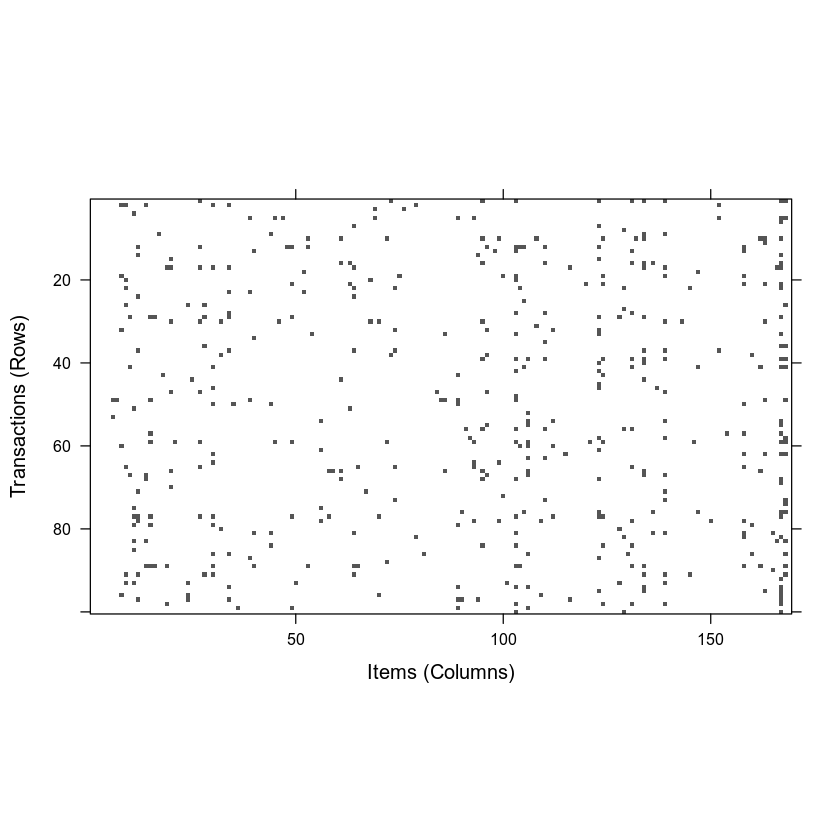

In [11]:
image(sample(groceries, 100))

## train
apriori(data = mydata, parameter = list(support = .1, confidence = .8, minlen = 1))

## test
inspect(myrules)

If an item is purchased twice a day (about 60 times in a month of data), it may be an interesting pattern. Since 60 out of 9,835 = .006, we'll try setting the support there first.

If the confidence is too high, we will be limited to the rules that are obvious or inevitable.

If confidence is too low, we might be overwhelmed with a large number of unreliable rules.

Setting the confidence to .25 will include the rules that are correct at least 25 percent of the time.

Setting minlen = 2 will eliminate rules that contain fewer than two items.

In [12]:
groceryrules = apriori(groceries, parameter = list(support=.006,
                                                   confidence = .25,
                                                   minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [13]:
groceryrules

set of 463 rules 

In [14]:
summary(groceryrules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence          lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :3.9565  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25

150 rules have only two items, while 297 have three, and 16 have four.

{bread} -> {butter} is size 2 and {peanut butter, jelly} -> {bread} is size 3

If most or all of the rules had support and confidence very near the minimum threshold it would mean that we may have set the bar too high.

Lift of a rule measures how much more likely one item or itemset is purchased relative to its typical rate of purchase, given that another item or itemset has been purchased.

$$lift(X \rightarrow Y)=\frac{confidence(X \rightarrow Y)}{support(Y)}$$

Large lift value is a strong indicator that a rule is important, and reflects a true connection between the items.

In [15]:
inspect(groceryrules[1:3])

    lhs                rhs               support     confidence lift    
[1] {potted plants} => {whole milk}      0.006914082 0.4000000  1.565460
[2] {pasta}         => {whole milk}      0.006100661 0.4054054  1.586614
[3] {herbs}         => {root vegetables} 0.007015760 0.4312500  3.956477


1: if a customer buys potted plants, they will also buy whole milk. This rule covers .7% of the transactions and is correct in 40% of purchases involving potted plants.

Lift value describes how much more likely a customer is to buy whole milk relative to the average customer, give that they bought a potted plant.

About 25.6% of the customers bought whole milk (support), while 40% of the customers buying a potted plant bought whole milk (confidence), the lift value is .4 / .256 = 1.56

<b>Actionable</b> rules provide a clear and useful insight.

<b>Trivial rules</b> include any rules that are so obvious that they are not worth mentioning - clear, but not useful.

<b>Inexplicable rules</b> provide connections between items that are so unclear that figuring out how to use the information is impossible or nearly impossible.

In [20]:
inspect(sort(groceryrules, by = 'lift')[1:5])

    lhs                   rhs                      support confidence     lift
[1] {herbs}            => {root vegetables}    0.007015760  0.4312500 3.956477
[2] {berries}          => {whipped/sour cream} 0.009049314  0.2721713 3.796886
[3] {other vegetables,                                                        
     tropical fruit,                                                          
     whole milk}       => {root vegetables}    0.007015760  0.4107143 3.768074
[4] {beef,                                                                    
     other vegetables} => {root vegetables}    0.007930859  0.4020619 3.688692
[5] {other vegetables,                                                        
     tropical fruit}   => {pip fruit}          0.009456024  0.2634561 3.482649


1. lift ~3.96 implies that people who buy herbs are nearly four times more likely to buy root vegetables than the typical customer
2. Whipped cream is over three times more likely to be found in a shopping cart with berries versus other carts.

In [21]:
berryrules = subset(groceryrules, items %in% 'berries')

In [22]:
inspect(berryrules)

    lhs          rhs                  support     confidence lift    
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  3.796886
[2] {berries} => {yogurt}             0.010574479 0.3180428  2.279848
[3] {berries} => {other vegetables}   0.010269446 0.3088685  1.596280
[4] {berries} => {whole milk}         0.011794611 0.3547401  1.388328


items %pin% 'fruit' allows to find both citrus fruit and tropical fruit

items %ain% c('berries', 'yogurt') finds only rules with both berries and yogurt.

In [23]:
write(groceryrules, file = 'groceryrules.csv', sep = ',', quote = TRUE, row.names = F)

In [24]:
groceryrules_df = as(groceryrules, 'data.frame')

In [25]:
str(groceryrules_df)

'data.frame':	463 obs. of  4 variables:
 $ rules     : Factor w/ 463 levels "{baking powder} => {other vegetables}",..: 340 302 207 206 208 341 402 21 139 140 ...
 $ support   : num  0.00691 0.0061 0.00702 0.00773 0.00773 ...
 $ confidence: num  0.4 0.405 0.431 0.475 0.475 ...
 $ lift      : num  1.57 1.59 3.96 2.45 1.86 ...
